In [ ]:
##module to get timeseries of the regional average of a variable

In [1]:
import modules as md 
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import s3fs
%matplotlib inline


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


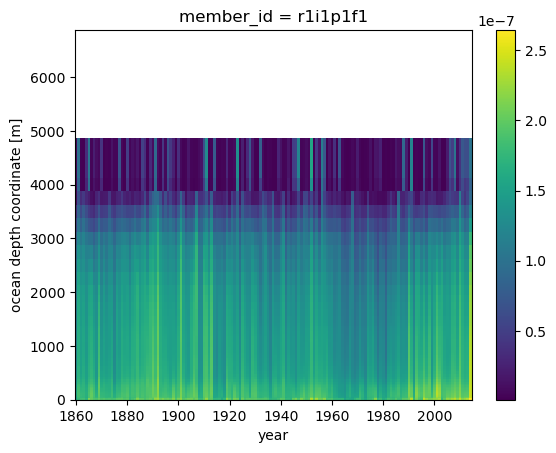

In [4]:

min_lat= 65.9
max_lat= 81.9
min_lon= 0
max_lon= 360
var='chlos'
cel_type='volcello'
model= 'NorESM2-LM'


files_dir='/escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
inp=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var,cel_type]

BSsst=md.regional_average(inp)
#BSsst.mean(dim='year').plot.contourf()
BSsst.plot(x='year')


In [6]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0",
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

remote_files = 's3://escience2022/Ada/monthly/mlotstmax_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
remote_files = s3.glob(remote_files)
print(len(remote_files))

fileset = [s3.open(file) for file in remote_files]
ds = xr.open_mfdataset(fileset, combine='by_coords')
print(ds)

17
<xarray.Dataset>
Dimensions:             (time: 1980, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    mlotstmax           (time, j, i) float32 dask.array<chunksize=(120, 385, 360), meta=np.n